#### 다중 분류를 위한 OvR(OvA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행

In [42]:
## 모듈로딩
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

- 데이터셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지 => 1D이므로 64개 피쳐
    * 이미지 라벨 / 타겟 => 숫자 0~9까지 즉, 총 10개 클래스
    * 흑백 이미지 

In [43]:
featureDF, targetSR = load_digits(as_frame=True,return_X_y=True)
# 데이터에서 피쳐와 타겟만 받고 싶을때 이렇게 쓰면 됨.

featureDF = featureDF / 255
# 이미지 픽셀 : 0 ~ 255 범위

print(featureDF.shape,featureDF.ndim,targetSR.shape,targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [44]:
featureDF.head(1), targetSR.head()

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0        0.0        0.0   0.019608    0.05098   0.035294   0.003922   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0        0.0        0.0   0.023529    0.05098   0.039216        0.0   
 
    pixel_7_6  pixel_7_7  
 0        0.0        0.0  
 
 [1 rows x 64 columns],
 0    0
 1    1
 2    2
 3    3
 4    4
 Name: target, dtype: int32)

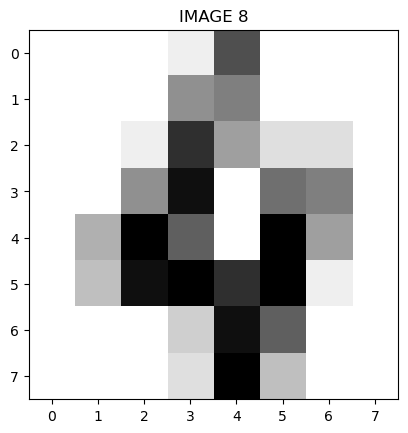

In [53]:
## 이미지 데이터 시각화
import matplotlib.pyplot as plt

# 1D ==> 2D 형태로 이미지 데이터
imgData = featureDF.iloc[4].to_numpy().reshape(-1,8)
imgData.shape

# 시각화
plt.imshow(imgData,cmap='binary')
plt.title(f'IMAGE {targetSR[1796]}')
plt.show()

- 학습용 데이터셋 준비 : trainDS,testDS

In [46]:
X_train,X_test,y_train,y_test = train_test_split(featureDF,
                                                 targetSR,
                                                 stratify = targetSR,random_state = 10)

In [57]:
featureDF

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.019608,0.050980,0.035294,0.003922,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.023529,0.050980,0.039216,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.047059,0.050980,0.019608,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.043137,0.062745,0.039216,0.000000,0.0
2,0.0,0.0,0.000000,0.015686,0.058824,0.047059,0.000000,0.0,0.0,0.000000,...,0.019608,0.0,0.0,0.000000,0.000000,0.011765,0.043137,0.062745,0.035294,0.0
3,0.0,0.0,0.027451,0.058824,0.050980,0.003922,0.000000,0.0,0.0,0.031373,...,0.035294,0.0,0.0,0.000000,0.027451,0.050980,0.050980,0.035294,0.000000,0.0
4,0.0,0.0,0.000000,0.003922,0.043137,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.007843,0.062745,0.015686,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.015686,0.039216,0.050980,0.023529,0.000000,0.0,0.0,0.003922,...,0.015686,0.0,0.0,0.000000,0.007843,0.054902,0.058824,0.035294,0.000000,0.0
1793,0.0,0.0,0.023529,0.062745,0.050980,0.043137,0.003922,0.0,0.0,0.000000,...,0.003922,0.0,0.0,0.000000,0.023529,0.062745,0.054902,0.023529,0.000000,0.0
1794,0.0,0.0,0.003922,0.043137,0.058824,0.003922,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.007843,0.035294,0.050980,0.023529,0.000000,0.0
1795,0.0,0.0,0.007843,0.039216,0.027451,0.000000,0.000000,0.0,0.0,0.000000,...,0.007843,0.0,0.0,0.000000,0.019608,0.047059,0.062745,0.047059,0.000000,0.0


In [47]:
featureDF.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.00000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.001192,0.020411,0.046415,0.046463,0.022674,0.005342,0.000508,0.000022,0.007819,...,0.014608,0.00081,0.000002,0.001096,0.021794,0.047408,0.046310,0.026526,0.008109,0.001429
std,0.0,0.003558,0.018646,0.016662,0.016813,0.022221,0.013042,0.004068,0.000369,0.012534,...,0.019292,0.00386,0.000093,0.003664,0.020012,0.017156,0.019349,0.023140,0.016041,0.007295
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.003922,0.039216,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.003922,0.043137,0.039216,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.015686,0.050980,0.050980,0.015686,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.00000,0.000000,0.000000,0.015686,0.050980,0.054902,0.023529,0.000000,0.000000
75%,0.0,0.000000,0.035294,0.058824,0.058824,0.043137,0.000000,0.000000,0.000000,0.011765,...,0.027451,0.00000,0.000000,0.000000,0.039216,0.062745,0.062745,0.047059,0.007843,0.000000
max,0.0,0.031373,0.062745,0.062745,0.062745,0.062745,0.062745,0.058824,0.007843,0.062745,...,0.062745,0.05098,0.003922,0.035294,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745


* OvR 또는 OvA
- 클래스마다 이진 분류기 만들어서 가장 높은 결정점수 낸 클래스 선택

In [48]:
# 모듈 로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clr.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [49]:
# 모델 파라미터
print(f'ovr_clr.estimator_ : {len(ovr_clr.estimators_)}개')
print(f'ovr_clr.classes_: {ovr_clr.classes_}')
print(f'ovr_clr.classes_: {ovr_clr.n_classes_}')
print(f'ovr_clr.label_binarizer_: {ovr_clr.label_binarizer_}')

ovr_clr.estimator_ : 10개
ovr_clr.classes_: [0 1 2 3 4 5 6 7 8 9]
ovr_clr.classes_: 10
ovr_clr.label_binarizer_: LabelBinarizer(sparse_output=True)


In [50]:
for idx in range(ovr_clr.n_classes_):
    print(f'[{idx} 분류기]',ovr_clr.estimators_[idx].coef_,ovr_clr.estimators_[idx].intercept_)

[0 분류기] [[ 0.00000000e+00 -1.17196041e-01 -3.62115414e-01  6.37552799e-01
  -2.59578652e-01 -1.28016014e+00 -5.49749533e-01 -5.15479583e-02
  -2.48862606e-03 -4.50666506e-01  8.75526200e-01  6.75749645e-01
   7.60781731e-01  1.42129814e+00 -3.72846765e-01 -4.79063363e-02
  -8.76236866e-04  4.83802735e-01  1.73551803e+00 -5.66736111e-01
  -1.82788917e+00  2.02767573e+00  6.80537079e-01 -2.30064300e-02
  -2.34486097e-04  1.17127129e+00  1.43110315e+00 -2.77367541e+00
  -4.06936083e+00  6.21911139e-01  1.75082255e+00 -1.03967735e-03
   0.00000000e+00  1.44036867e+00  1.66062966e+00 -3.35454010e+00
  -4.16865797e+00 -1.82220092e-01  1.69967724e+00  0.00000000e+00
  -6.21171286e-03  7.53876189e-01  2.70442673e+00 -2.23403029e+00
  -2.41524398e+00  1.07396751e+00  9.18935115e-01 -1.27375120e-02
  -1.91685177e-03  2.36248947e-02  2.27897902e+00  3.91337241e-01
   5.69335241e-01  1.80122758e+00 -6.50991155e-01 -7.94369750e-02
  -3.43582122e-04 -1.12648516e-01 -5.45164480e-01  6.14765194e-01
  

In [56]:
X_test

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1310,0.0,0.003922,0.050980,0.062745,0.062745,0.031373,0.000000,0.0,0.0,0.043137,...,0.039216,0.000000,0.0,0.003922,0.047059,0.062745,0.062745,0.043137,0.003922,0.000000
1249,0.0,0.003922,0.027451,0.050980,0.054902,0.011765,0.000000,0.0,0.0,0.039216,...,0.000000,0.000000,0.0,0.000000,0.019608,0.054902,0.054902,0.019608,0.000000,0.000000
1523,0.0,0.000000,0.011765,0.050980,0.062745,0.058824,0.023529,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.015686,0.062745,0.027451,0.000000,0.000000,0.000000
1596,0.0,0.000000,0.027451,0.058824,0.058824,0.023529,0.000000,0.0,0.0,0.015686,...,0.000000,0.000000,0.0,0.000000,0.019608,0.058824,0.058824,0.007843,0.000000,0.000000
1607,0.0,0.000000,0.019608,0.062745,0.003922,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.019608,0.062745,0.007843,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0.0,0.000000,0.007843,0.050980,0.054902,0.023529,0.000000,0.0,0.0,0.000000,...,0.019608,0.000000,0.0,0.000000,0.011765,0.043137,0.058824,0.062745,0.047059,0.000000
330,0.0,0.000000,0.019608,0.031373,0.047059,0.062745,0.015686,0.0,0.0,0.011765,...,0.000000,0.000000,0.0,0.000000,0.027451,0.050980,0.027451,0.000000,0.000000,0.000000
1045,0.0,0.000000,0.007843,0.047059,0.003922,0.000000,0.000000,0.0,0.0,0.000000,...,0.050980,0.000000,0.0,0.000000,0.011765,0.054902,0.062745,0.047059,0.011765,0.000000
1613,0.0,0.000000,0.000000,0.054902,0.027451,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.050980,0.047059,0.000000,0.000000,0.000000


In [51]:
ovr_clr.predict_proba(X_test.iloc[:5])

array([[0.07876151, 0.0779299 , 0.1175886 , 0.19227914, 0.04654107,
        0.10630541, 0.08301244, 0.069865  , 0.09095657, 0.13676037],
       [0.11818165, 0.063448  , 0.07978328, 0.15445847, 0.06509225,
        0.1106605 , 0.05297834, 0.08131463, 0.09214672, 0.18193616],
       [0.08491133, 0.08854812, 0.06806098, 0.08223077, 0.11540094,
        0.12026799, 0.05972546, 0.18197716, 0.09313422, 0.10574302],
       [0.09179917, 0.12072481, 0.09046504, 0.07605257, 0.09315373,
        0.1081303 , 0.07348119, 0.09984152, 0.15652038, 0.08983129],
       [0.0767048 , 0.08920019, 0.06765403, 0.04953051, 0.18298465,
        0.12274993, 0.10405859, 0.14372988, 0.08556549, 0.07782195]])

In [54]:
ovr_clr.decision_function(X_train.iloc[:1])

array([[-2.50446795, -2.35958461, -2.25852817, -1.81815566, -2.49158504,
        -1.91961043, -2.1005113 , -2.4529718 , -2.44673987, -2.33979431]])

* 2진분류기 5개
- 1번쨰 2진분류기 => 양성/True에 대한 값을 추출 decision_functions ==> 확률
- 2번쨰 2진분류기 => 양성/True에 대한 값을 추출 decision_functions ==> 확률
- 3번쨰 2진분류기 => 양성/True에 대한 값을 추출 decision_functions ==> 확률
- 4번쨰 2진분류기 => 양성/True에 대한 값을 추출 decision_functions ==> 확률
- 5번쨰 2진분류기 => 양성/True에 대한 값을 추출 decision_functions ==> 확률
